In [2]:
from os import path
import os
from torchvision import datasets
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import SubsetRandomSampler, DataLoader
import matplotlib.pyplot as plt
from random import randint
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch
import time
import copy

/Users/fluffyunicorn/workspace/Cauldron/CS826_Project/ENV/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
# Using pretrained weights:
model = resnet50(weights=None)
model.fc = nn.Linear(2048,120)
model
# transformations = weights.transforms()
# transformations

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
print("Model weights for conv1 layer before loading")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size(), model.state_dict()[param_tensor][0][0])
    break

Model weights for conv1 layer before loading
conv1.weight 	 torch.Size([64, 3, 7, 7]) tensor([[-0.0119, -0.0082, -0.0250, -0.0121,  0.0290, -0.0164,  0.0173],
        [-0.0119, -0.0152,  0.0214, -0.0283, -0.0220,  0.0102,  0.0184],
        [-0.0388,  0.0461, -0.0121,  0.0020,  0.0238,  0.0067,  0.0125],
        [-0.0155, -0.0036,  0.0135, -0.0263,  0.0053,  0.0183,  0.0242],
        [-0.0293, -0.0522,  0.0252,  0.0092,  0.0067,  0.0107,  0.0115],
        [-0.0442, -0.0442, -0.0038,  0.0419,  0.0205,  0.0299, -0.0352],
        [ 0.0131,  0.0225, -0.0089, -0.0187, -0.0119,  0.0289,  0.0323]])


In [49]:
PATH = "7"
model.load_state_dict(torch.load(PATH))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [50]:
print("Model weights for conv1 layer before loading")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size(), model.state_dict()[param_tensor][0][0])
    break

Model weights for conv1 layer before loading
conv1.weight 	 torch.Size([64, 3, 7, 7]) tensor([[-0.0074, -0.0032,  0.0374, -0.0636,  0.0479, -0.0203,  0.0088],
        [-0.0574,  0.0447,  0.0775, -0.1787,  0.0884,  0.0293, -0.0583],
        [ 0.0684, -0.2704,  0.4035, -0.1343, -0.1649,  0.2187, -0.0729],
        [ 0.0251,  0.1291, -0.6648,  1.1661, -0.9231,  0.2877, -0.0371],
        [-0.1087,  0.3815, -0.4549, -0.1033,  0.6837, -0.5786,  0.2246],
        [ 0.0257, -0.1770,  0.6437, -0.9118,  0.5264, -0.0493, -0.0681],
        [ 0.0453, -0.1307,  0.0179,  0.2511, -0.3575,  0.1898, -0.0223]])


Text(0.5, 1.0, 'silky_terrier')

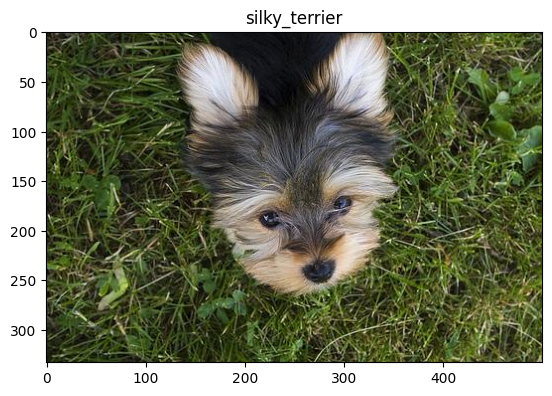

In [8]:
weights=ResNet50_Weights.IMAGENET1K_V2
transformations = weights.transforms()

DS_STORE = ".DS_STORE"
DATASET_PATH = path.normpath("dataset")
if path.exists(path.join(DATASET_PATH, DS_STORE)):
    os.remove(path.join(DATASET_PATH, DS_STORE))
os.listdir(DATASET_PATH)
IMAGES = path.join(DATASET_PATH, os.listdir(DATASET_PATH)[0])
ANNOTATIONS = path.join(DATASET_PATH, os.listdir(DATASET_PATH)[1])
IMAGES, ANNOTATIONS
data = datasets.ImageFolder(root=os.path.join(IMAGES, "Images"), transform=transformations)
list_of_classes = [_.split("-")[1] for _ in data.classes]

random_number = randint(0, len(data))
plt.imshow(plt.imread(data.samples[random_number][0]))
plt.title(list_of_classes[data.samples[random_number][1]])

In [9]:

BATCH_SIZE = 32
train, val, test = torch.utils.data.random_split(data, [0.8, 0.1, 0.1])

data_loader = {}
data_loader["train"] = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
data_loader["val"] = DataLoader(val, batch_size=BATCH_SIZE, shuffle=True)
data_loader["test"] = DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)


In [51]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [60]:
PATH = "12"
model.load_state_dict(torch.load(PATH))
model.eval()

i = 0
incorrect_pred = []
correct_pred = []
for img, label in data_loader["test"]:
    if True:
        print("{} of {}".format( i, len(data_loader["test"])))
#     print(img, label)
    outputs = model(img)
    _, preds = torch.max(outputs, 1)
#     print(_, preds)
    for p, l in zip(preds,label) :
        if p==l:
            correct_pred.append(label)
        else:
            incorrect_pred.append(label)
    i = i+1
    

0 of 65
1 of 65
2 of 65
3 of 65
4 of 65
5 of 65
6 of 65
7 of 65
8 of 65
9 of 65
10 of 65
11 of 65
12 of 65
13 of 65
14 of 65
15 of 65
16 of 65
17 of 65
18 of 65
19 of 65
20 of 65
21 of 65
22 of 65
23 of 65
24 of 65
25 of 65
26 of 65
27 of 65
28 of 65
29 of 65
30 of 65
31 of 65
32 of 65
33 of 65
34 of 65
35 of 65
36 of 65
37 of 65
38 of 65
39 of 65
40 of 65
41 of 65
42 of 65
43 of 65
44 of 65
45 of 65
46 of 65
47 of 65
48 of 65
49 of 65
50 of 65
51 of 65
52 of 65
53 of 65
54 of 65
55 of 65
56 of 65
57 of 65
58 of 65
59 of 65
60 of 65
61 of 65
62 of 65
63 of 65
64 of 65


In [61]:
a = []
for batch_pred in correct_pred:
    for _ in batch_pred:
        a.append(_)

b = []
for batch_pred in incorrect_pred:
    for _ in batch_pred:
        b.append(_)
len(a), len(b)

(58586, 7050)

In [62]:
(len(a)/( len(a)+ len(b)))*100

89.25894326284356

In [54]:
# Model 7
(len(a)/( len(a)+ len(b)))*100

89.1462002559571

In [57]:
# Model 4
(len(a)/( len(a)+ len(b)))*100

89.6337375830337

In [38]:
# Model 2copy
(len(a)/( len(a)+ len(b)))*100

85.27637272228655

In [21]:
import numpy as np
result =np.unique(a, return_counts=True)
len(result[1]), sum(result[1]), len(result)


# np.array(correct_pred).


(120, 55972, 2)

<BarContainer object of 20 artists>

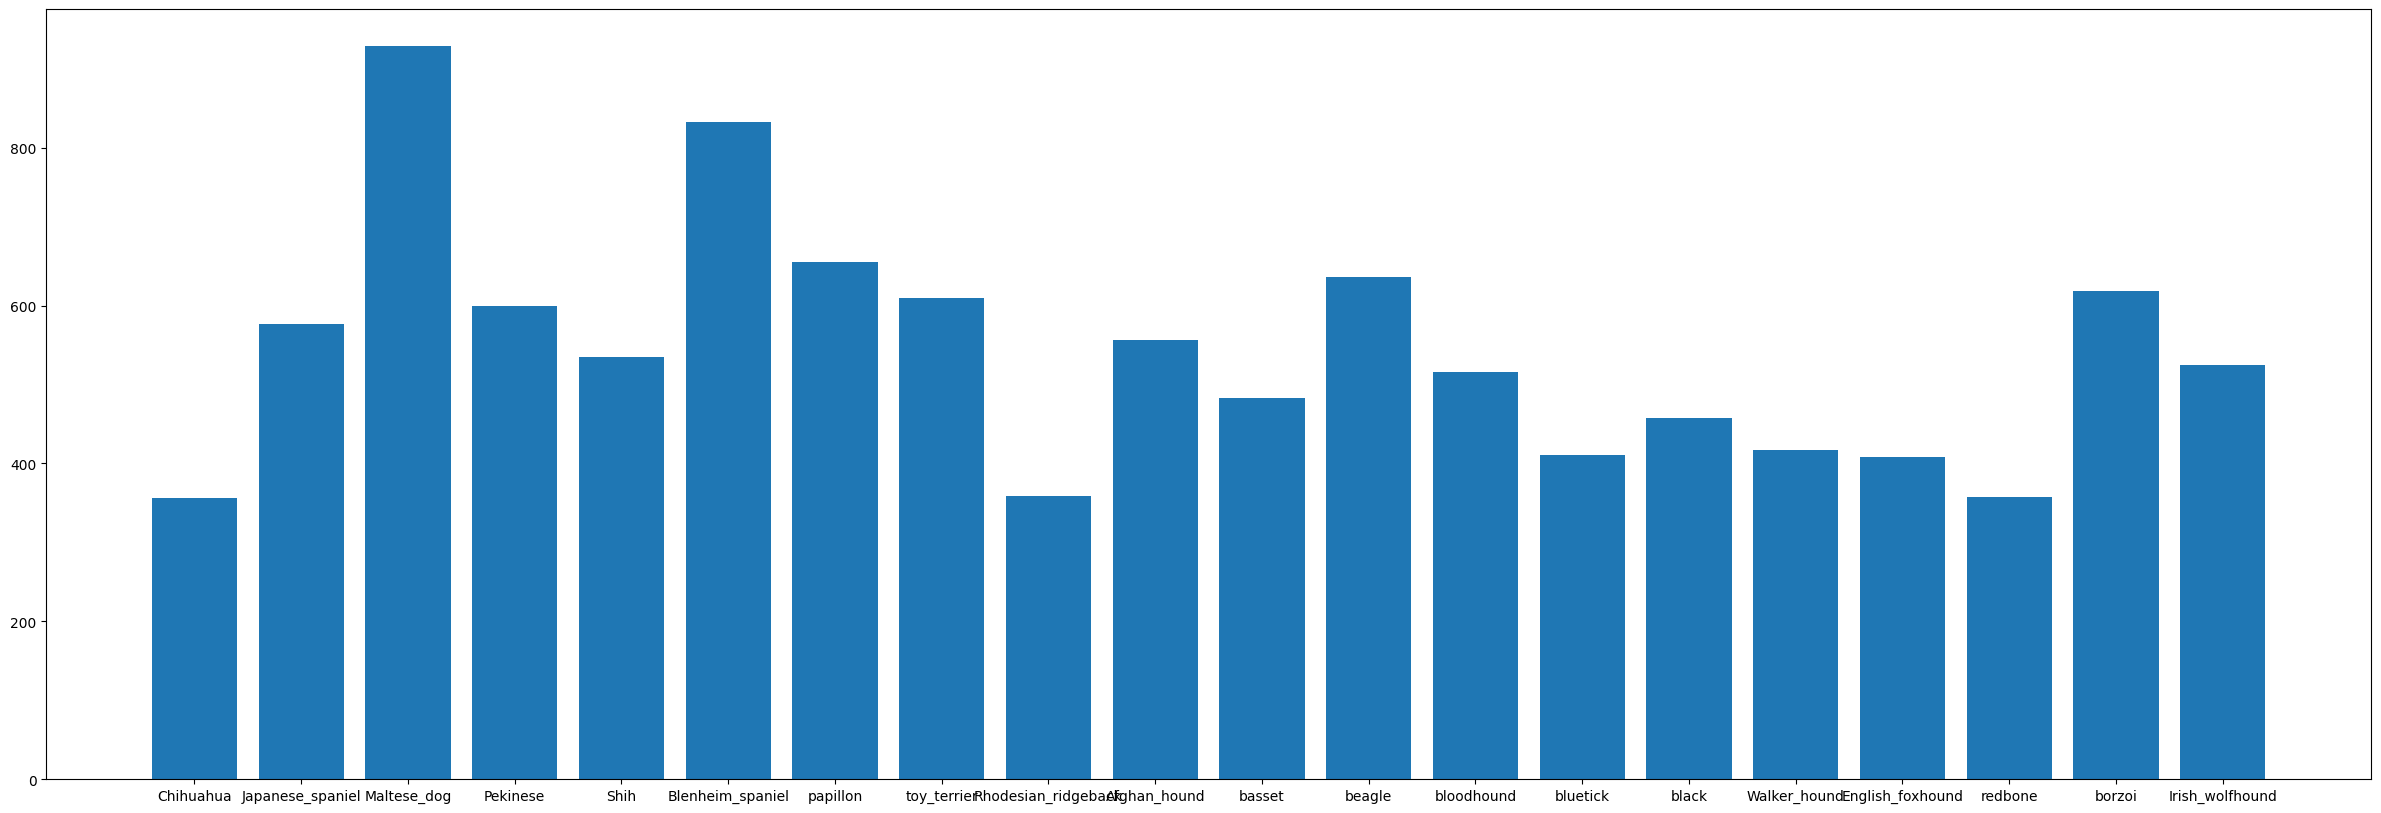

In [47]:
plt.figure(figsize=(30,10))

plt.bar([list_of_classes[_] for _ in result[0]][:20], result[1][:20])

In [63]:
random_number = randint(0, len(data_loader["test"]))
plt.imshow(plt.imread(data_loader["test"].samples[random_number][0]))
plt.title(list_of_classes[data_loader["test"].samples[random_number][1]])

AttributeError: 'DataLoader' object has no attribute 'samples'